In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('data\song_data.csv')
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [3]:
con1=np.where(df['song_popularity']<40)[0]
con2=np.where(df['song_popularity']>60)[0]
index=np.concatenate((con1,con2))
index.shape

(12128,)

In [4]:
df1=df.loc[index]

def trans(x):
    if x>=60:
        return "popular"
    elif x<=40:
        return "unpopular"

df1['song_popularity']=df1['song_popularity'].apply(trans)

In [5]:
X=df1[df1.columns[2:]].values #song_popularity
y=df1[df1.columns[1]].values #other features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    shuffle=True,random_state=123, stratify=y)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipe=make_pipeline(StandardScaler(),
                  KNeighborsClassifier(n_neighbors=3,p=2))

pipe.fit(X_train,y_train)
acc=np.sum(pipe.predict(X_test)==y_test)/y_test.shape[0]
print('%.2f%%'%acc)

0.68%


In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {'kneighborsclassifier__n_neighbors': [1, 3, 5, 7, 9, 11],
               'kneighborsclassifier__p': [1,2]}

gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  refit=True,#default
                  cv=10,#k-fold cross validation, strtified, accuracy
                  n_jobs=-1)

gs.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (gs.best_score_*100))#available after fitting
print('Best Params:', gs.best_params_)#get the parameter combination

Best Accuracy: 69.64%
Best Params: {'kneighborsclassifier__n_neighbors': 1, 'kneighborsclassifier__p': 2}


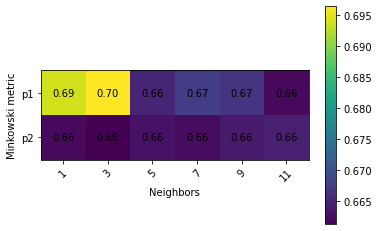

In [8]:
from mlxtend.plotting import heatmap
import numpy as np
import pandas as pd

grid = np.zeros((2, 6))
grid[0, :] = gs.cv_results_['mean_test_score'][:6]
grid[1, :] = gs.cv_results_['mean_test_score'][6:]


heatmap(grid, 
        column_names=[1, 3, 5, 7, 9, 11], 
        row_names=['p1','p2'])
plt.ylabel('Minkowski metric')
plt.xlabel('Neighbors')
plt.show()

very stange, don't know why

In [9]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, None],
               'criterion': ['gini', 'entropy']}#None means no restrain


gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=123),
                  param_grid=param_grid,
                  refit=True,#default
                  cv=10,#k-fold cross validation, strtified, accuracy
                  n_jobs=-1)

gs.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (gs.best_score_*100))#available after fitting
print('Best Params:', gs.best_params_)#get the parameter combination

acc=np.sum(gs.best_estimator_.predict(X_test)==y_test)/y_test.shape[0]
print('%.2f%%'%acc)

Best Accuracy: 70.57%
Best Params: {'criterion': 'gini', 'max_depth': None}
0.71%


In [10]:
from sklearn.ensemble import RandomForestClassifier

clf1=RandomForestClassifier(random_state=123)

clf1.fit(X_train,y_train)
acc=np.sum(clf1.predict(X_test)==y_test)/y_test.shape[0]
print('%.2f%%'%acc)

0.75%
